<a href="https://colab.research.google.com/github/nitinsharma006/data_science/blob/main/Solving_Loan_Prediction_problem_using_Keras_Functional_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steps to build a Neural Network using Keras

<ol>1. Loading the dataset</ol>
<ol>2. Creating training and validation set</ol>
<ol>3. Defining the architecture of the model</ol>
<ol>4. Compiling the model (defining loss function, optimizer)</ol>
<ol>5. Training the model</ol>
<ol>6. Evaluating model performance on training and validation set</ol>

## 1. Loading the dataset

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
# importing the required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from google.colab import files
 
 
uploaded = files.upload()

Saving loan_prediction_data.csv to loan_prediction_data.csv


In [5]:
# loading the pre-processed dataset
data = pd.read_csv('loan_prediction_data.csv')

In [6]:
# looking at the first five rows of the dataset
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [7]:
# checking missing values
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
# checking the data type
data.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

In [9]:
# removing the loan_ID since these are just the unique values
data = data.drop('Loan_ID', axis=1)

In [10]:
# looking at the shape of the data
data.shape

(614, 12)

In [11]:
# separating the independent and dependent variables

# storing all the independent variables as X
X = data.drop('Loan_Status', axis=1)

# storing the dependent variable as y
y = data['Loan_Status']

In [12]:
# shape of independent and dependent variables
X.shape, y.shape

((614, 11), (614,))

## 2. Creating training and validation set

In [13]:
# Creating training and validation set

# stratify will make sure that the distribution of classes in train and validation set it similar
# random state to regenerate the same train and validation set
# test size 0.2 will keep 20% data in validation and remaining 80% in train set

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=data['Loan_Status'],random_state=10,test_size=0.2)

In [14]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((491, 11), (491,)), ((123, 11), (123,)))

## 3. Defining the architecture of the model

In [15]:
# import keras
import keras

# importing the sequential model
from keras.models import Sequential

# importing different layers from keras
from keras.layers import InputLayer, Dense 

Using TensorFlow backend.


In [16]:
# number of input neurons
X_train.shape

(491, 11)

In [17]:
# number of features in the data
X_train.shape[1]

11

In [18]:
# defining input neurons
input_neurons = X_train.shape[1]

# define number of output neurons
output_neurons = 1

In [19]:
# define hidden layers and neuron in each layer
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 10
neuron_hidden_layer_2 = 5

In [20]:
# defining the architecture of the model using Sequential API
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [21]:
# summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [22]:
from keras import Input, Model

In [23]:
# defining the architecture of the model using Functional API
x = Input(shape = (input_neurons,))
hidden1 = Dense(units=neuron_hidden_layer_1, activation='relu')(x)
hidden2 = Dense(units=neuron_hidden_layer_2, activation='relu')(hidden1)
output = Dense(units=output_neurons, activation='sigmoid')(hidden2)

model_functional = Model(x, output) 

In [24]:
# summary of the model
model_functional.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 11)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                120       
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6         
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


## 4. Compiling the model (defining loss function, optimizer)

In [25]:
# compiling the model

# loss as binary_crossentropy, since we have binary classification problem
# defining the optimizer as adam
# Evaluation metric as accuracy

model_functional.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## 5. Training the model

In [26]:
# training the model

# passing the independent and dependent features for training set for training the model

# validation data will be evaluated at the end of each epoch

# setting the epochs as 50

# storing the trained model in model_history variable which will be used to visualize the training process

model_history = model_functional.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)


Train on 491 samples, validate on 123 samples
Epoch 1/50
491/491 [==============================] - 0s 738us/step - loss: 0.6074 - accuracy: 0.6884 - val_loss: 0.5922 - val_accuracy: 0.6911
Epoch 2/50
491/491 [==============================] - 0s 60us/step - loss: 0.5987 - accuracy: 0.6864 - val_loss: 0.5852 - val_accuracy: 0.6911
Epoch 3/50
491/491 [==============================] - 0s 60us/step - loss: 0.5931 - accuracy: 0.6864 - val_loss: 0.5812 - val_accuracy: 0.6911
Epoch 4/50
491/491 [==============================] - 0s 73us/step - loss: 0.5889 - accuracy: 0.6864 - val_loss: 0.5782 - val_accuracy: 0.6911
Epoch 5/50
491/491 [==============================] - 0s 62us/step - loss: 0.5849 - accuracy: 0.6864 - val_loss: 0.5756 - val_accuracy: 0.6911
Epoch 6/50
491/491 [==============================] - 0s 65us/step - loss: 0.5821 - accuracy: 0.6884 - val_loss: 0.5735 - val_accuracy: 0.6911
Epoch 7/50
491/491 [==============================] - 0s 81us/step - loss: 0.5792 - accuracy: 

## 6. Evaluating model performance on validation set

In [27]:
# getting predictions for the validation set
prediction = model_functional.predict(X_test)

In [28]:
prediction = prediction.reshape(123,)

# converting probabilities to classes
prediction_int = prediction >= 0.5
prediction_int = prediction_int.astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


In [29]:
# calculating the accuracy on validation set
accuracy_score(y_test, prediction_int)

0.8130081300813008

### Visualizing the model performance

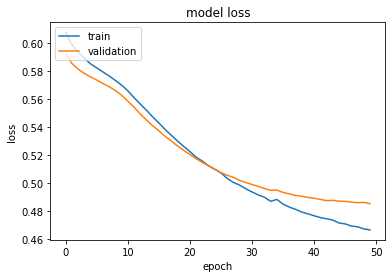

In [30]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

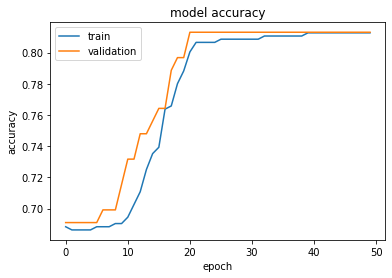

In [32]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()